In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [13]:
df_org = pd.read_csv('data/train.csv')
df = df_org.copy()

In [14]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [15]:
df.shape

(1628, 29)

In [16]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [17]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

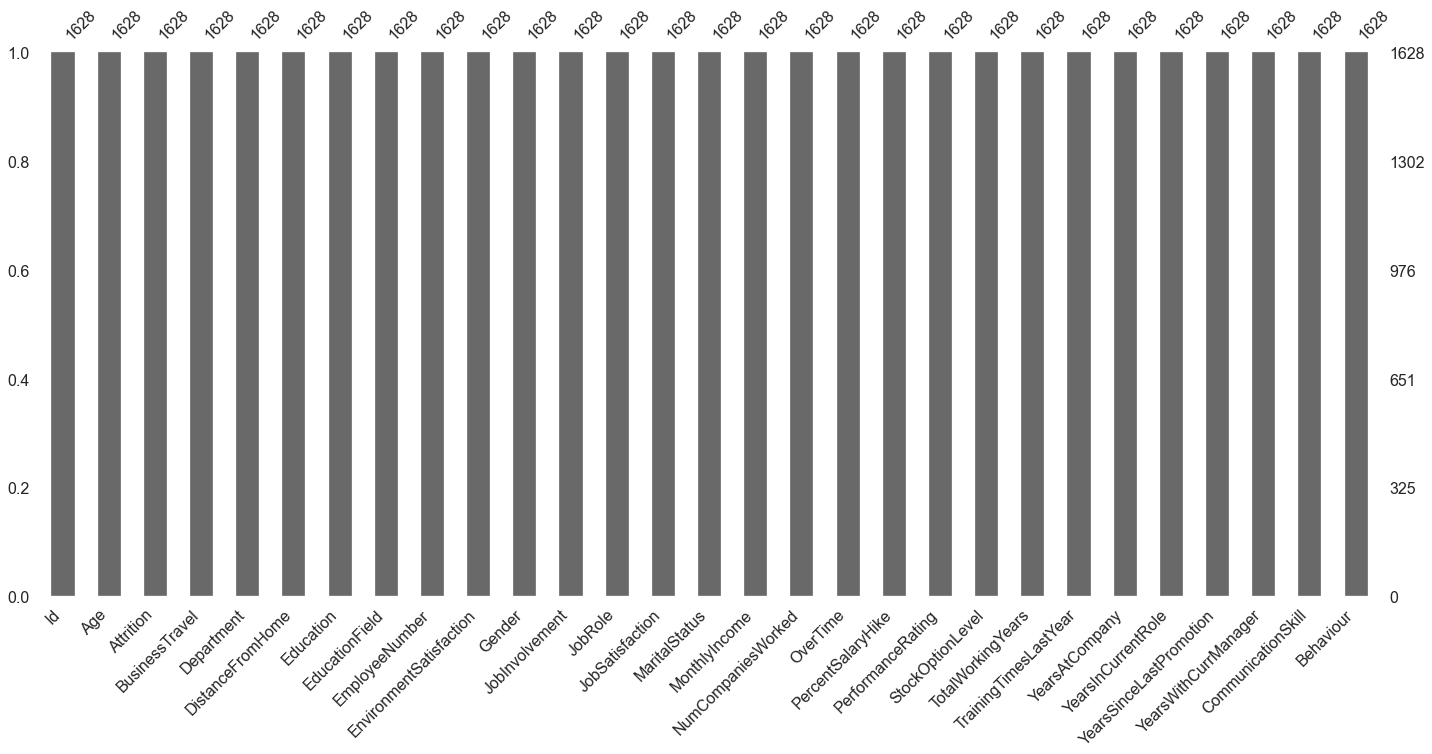

In [19]:
msno.bar(df)

In [9]:
import pandas_profiling
profile = df.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_1.html')

In [20]:
no_use_cols = ['Id']
df.drop(no_use_cols, inplace=True, axis=1)

In [21]:
df.shape

(1628, 28)

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(1000, 28)

In [25]:
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
catnom_cols = df.select_dtypes(include=['object']).columns.tolist()

In [26]:
catnom_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

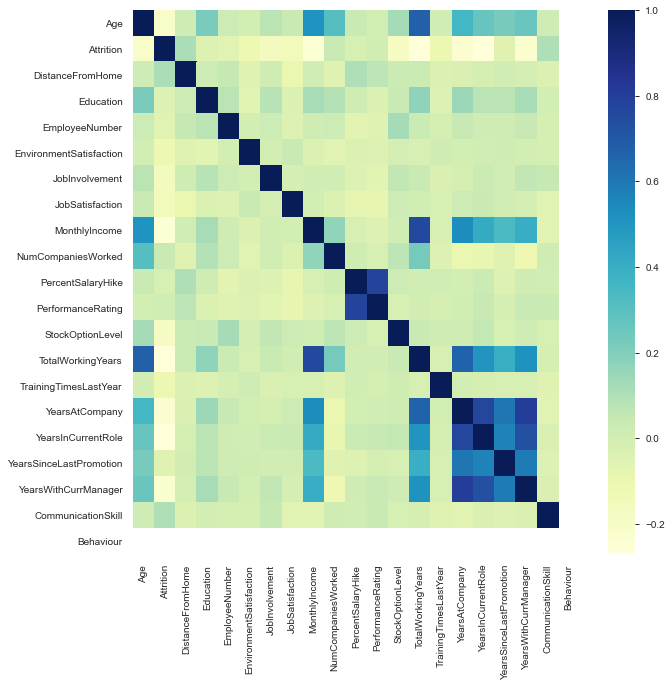

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df[int_cols].corr(), cmap="YlGnBu")

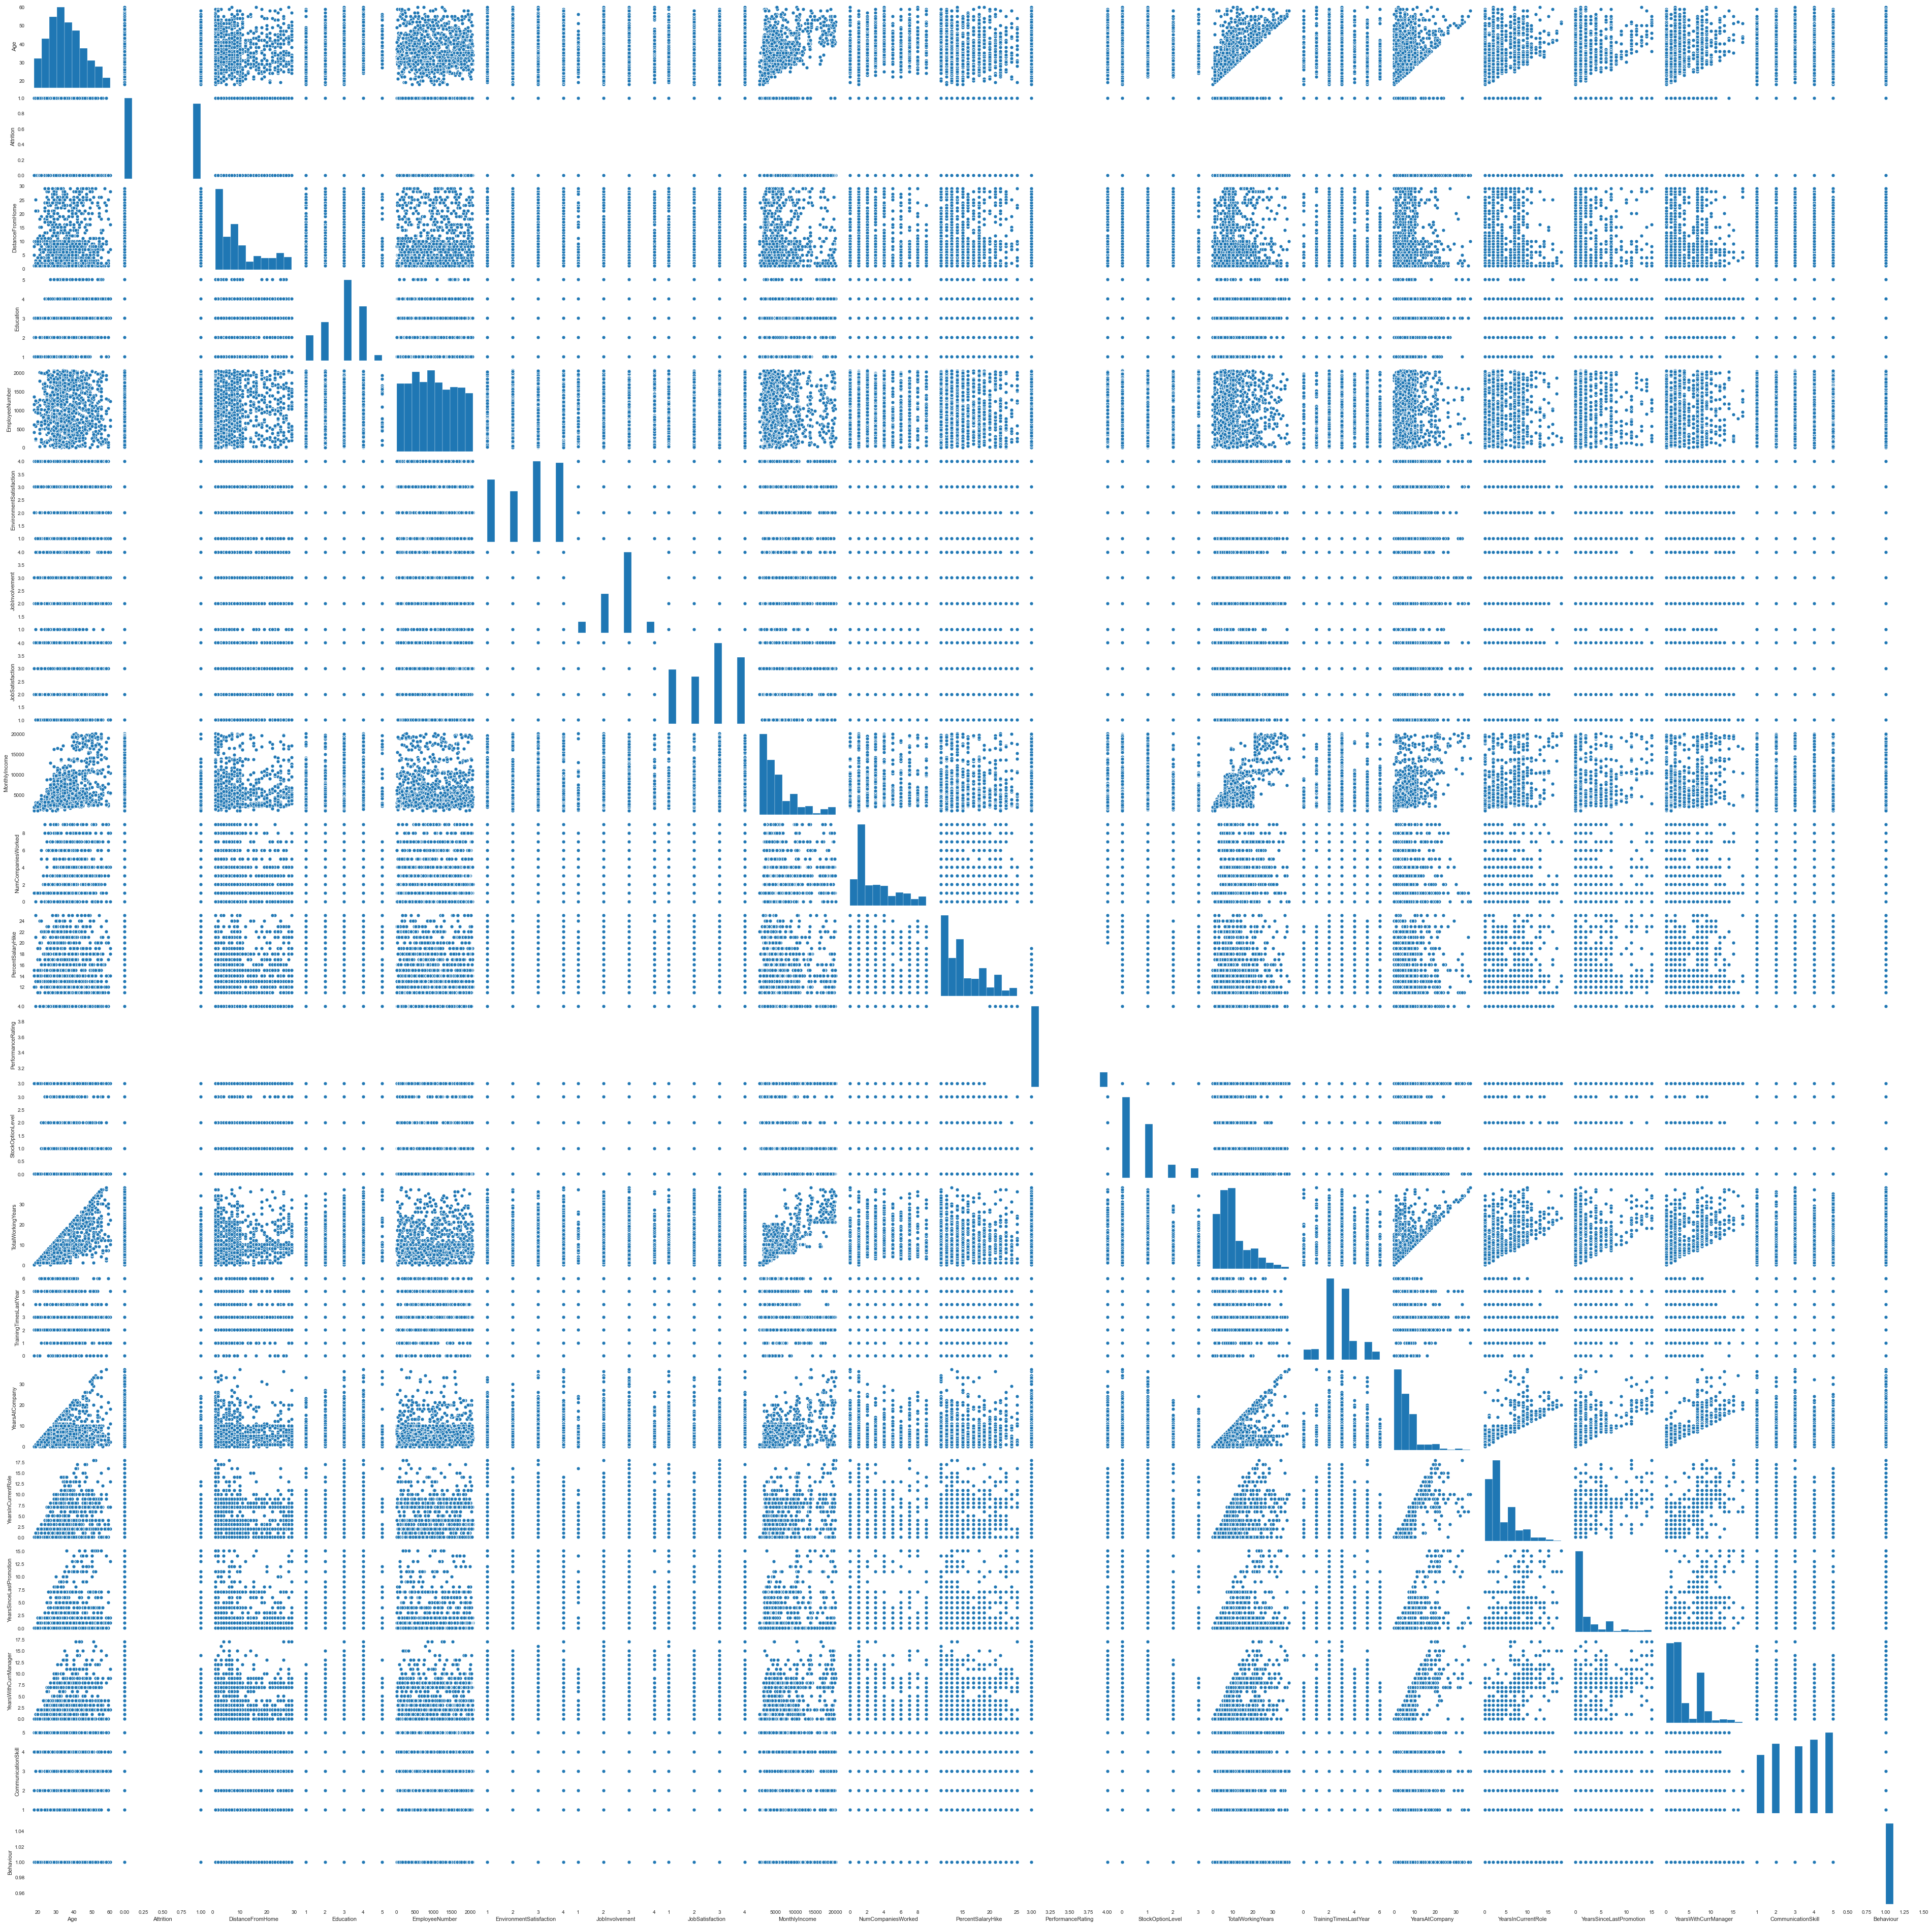

In [28]:
sns.pairplot(df[int_cols])

### Inferences  
- Behaviour has a constant value.
- Job Role and Department have high correlation.
- Performance Rating and Percentage Salary Hike has good correlation.

In [29]:
df.drop(['Behaviour'], inplace=True, axis = 1)

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

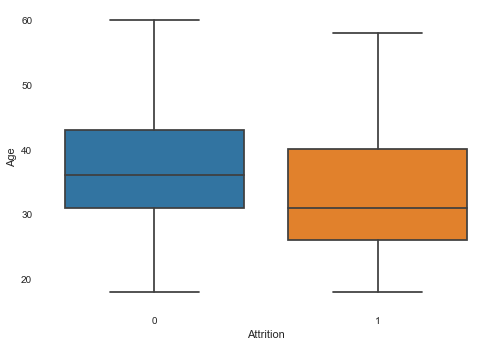

In [35]:
sns.boxplot(x = df.Attrition, y=df.Age)

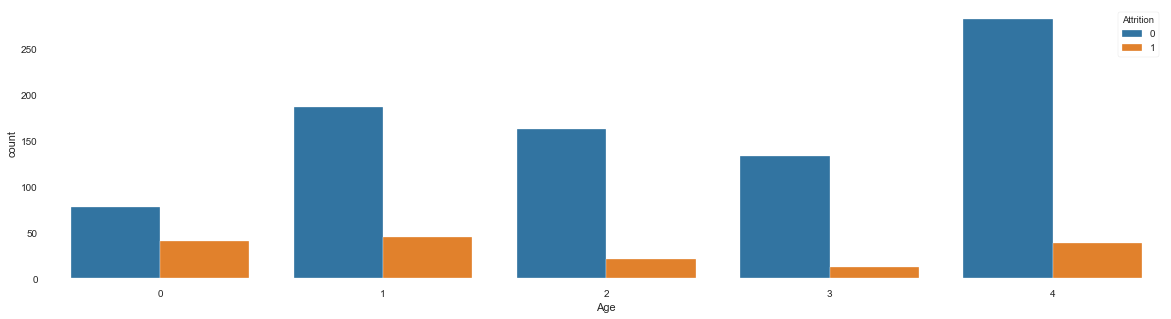

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(x = pd.cut(df.Age, bins = [0,26,32,36,40,np.inf], labels=[0,1,2,3,4]), hue = df['Attrition'])

**We can infer that people in 20s, early 30s and above 40s are more likeyly to leave the job. Age is an important factor**

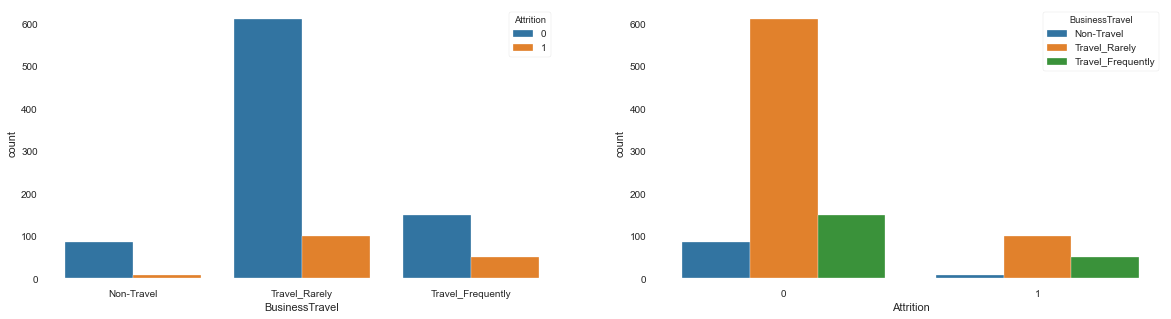

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.BusinessTravel, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.BusinessTravel, x = df.Attrition)

**Not too much of a deciding factor but adds information**

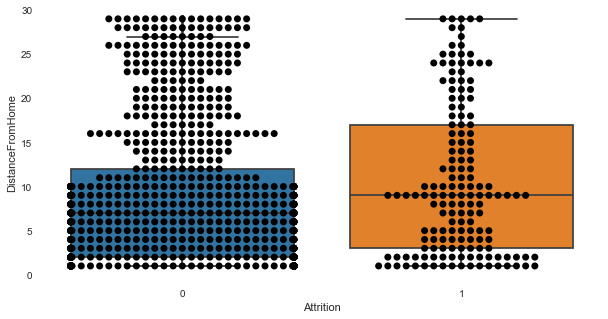

In [49]:
g = sns.swarmplot(x = df.Attrition, y = df.DistanceFromHome, size = 7,color = 'black')
g = sns.boxplot(x = df.Attrition, y = df.DistanceFromHome)
g.figure.set_size_inches(10,5)
plt.show()

**Imapcts Attrition**

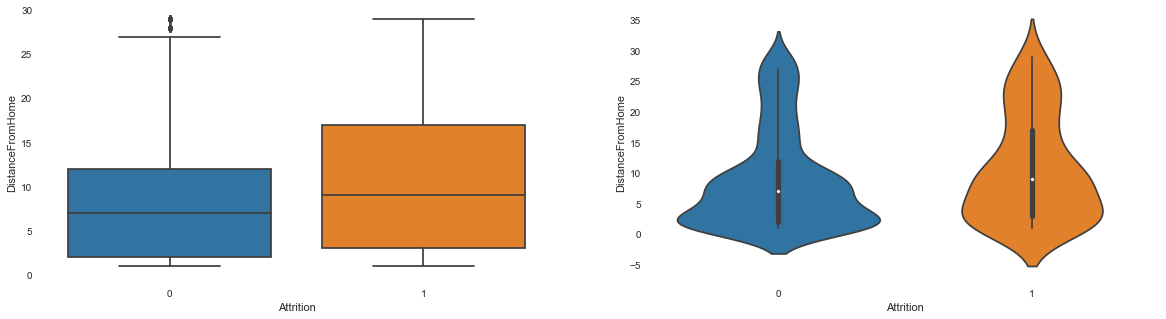

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.DistanceFromHome)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.DistanceFromHome)

**Impacts Attrition**

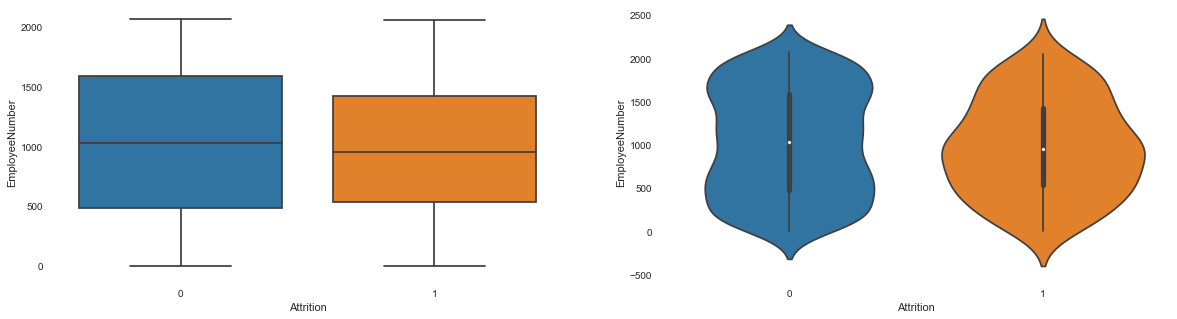

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.EmployeeNumber)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.EmployeeNumber)

**Adds some information.**

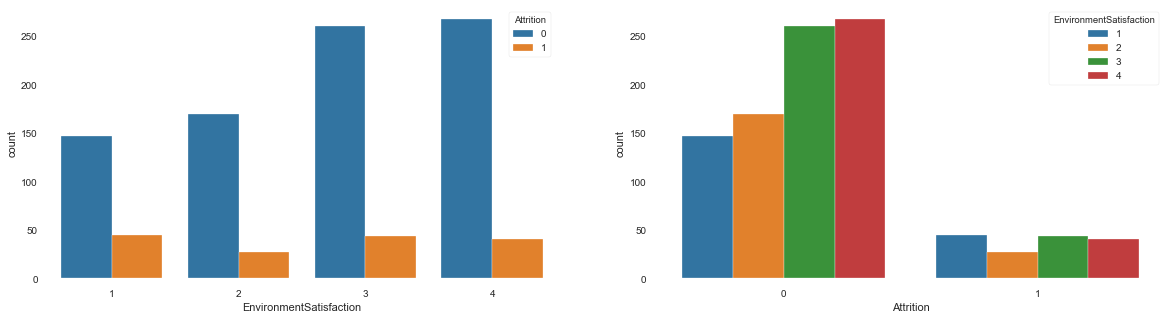

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.EnvironmentSatisfaction, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.EnvironmentSatisfaction, x = df.Attrition)

**Looks like Environmental Satisfaction does add some information.**

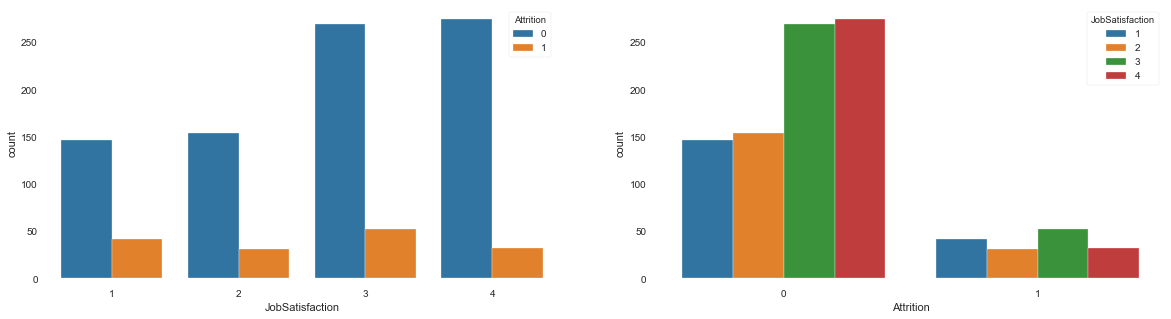

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.JobSatisfaction, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.JobSatisfaction, x = df.Attrition)

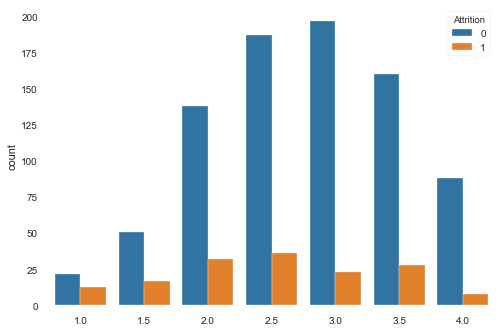

In [82]:
sns.countplot(x = (df.EnvironmentSatisfaction + df.JobSatisfaction) / 2, hue = df.Attrition)

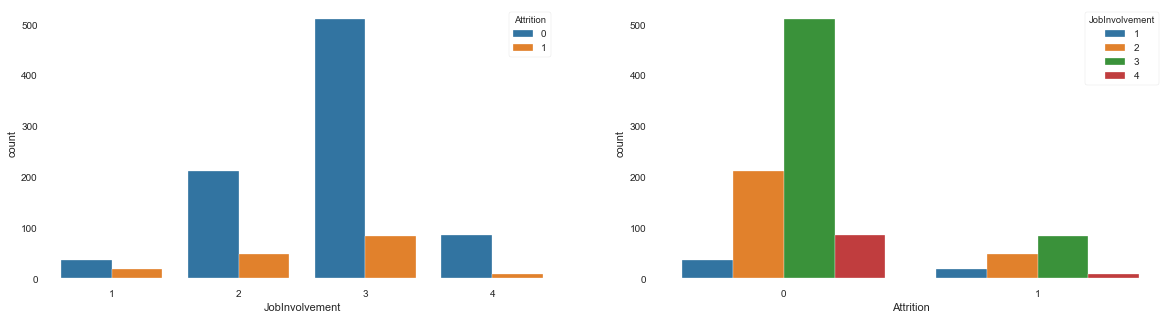

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.JobInvolvement, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.JobInvolvement, x = df.Attrition)

**Looks okay to be included in Train Data**

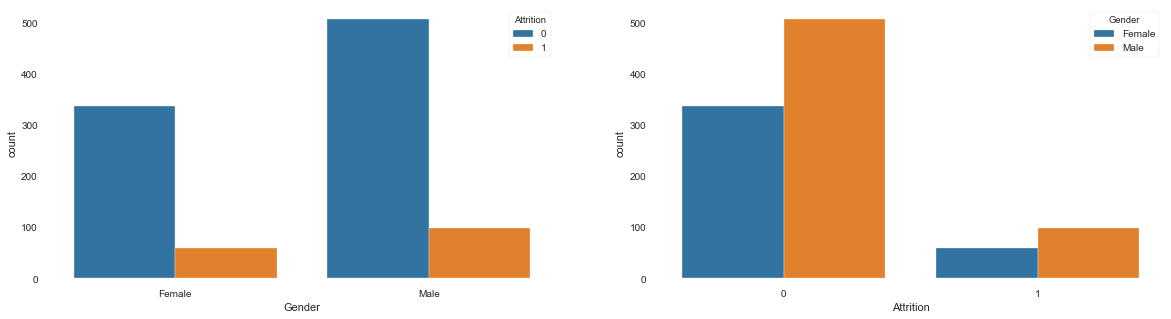

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.Gender, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.Gender, x = df.Attrition)

**Females have less Attrition Rate**

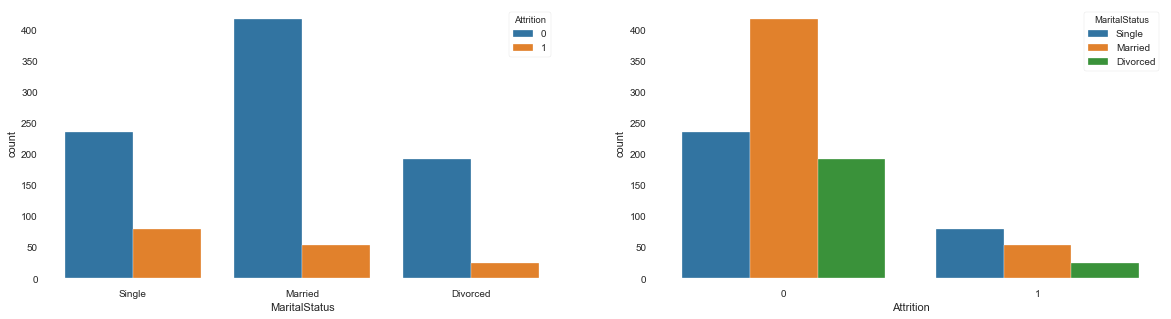

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.MaritalStatus, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.MaritalStatus, x = df.Attrition)

**Singles are more likely to leave the job**

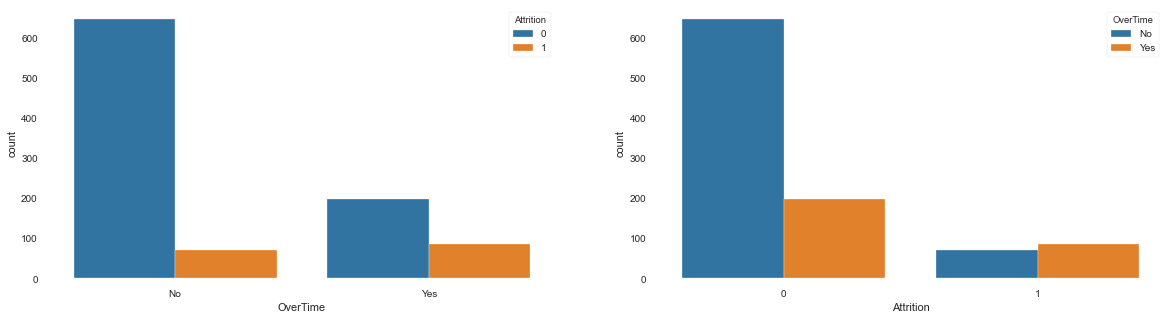

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.OverTime, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.OverTime, x = df.Attrition)

**Definitely has good information**

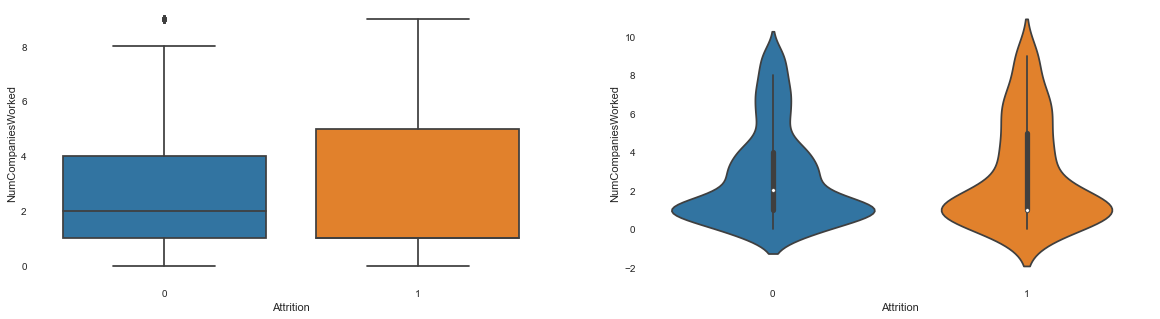

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.NumCompaniesWorked)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.NumCompaniesWorked)

**Looks like has information**

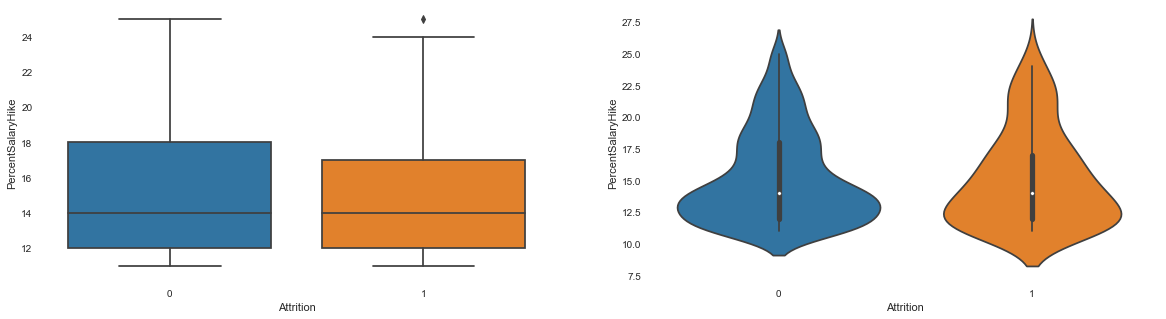

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.PercentSalaryHike)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.PercentSalaryHike)

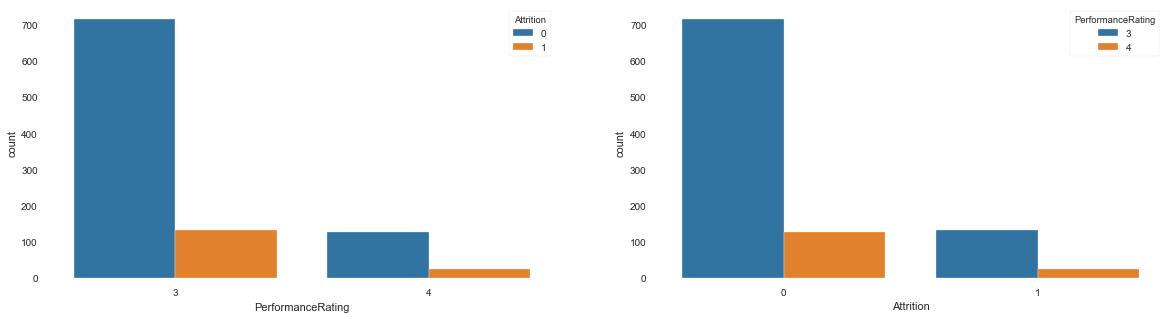

In [92]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.PerformanceRating, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.PerformanceRating, x = df.Attrition)

**Percentage Salary like looks better related**

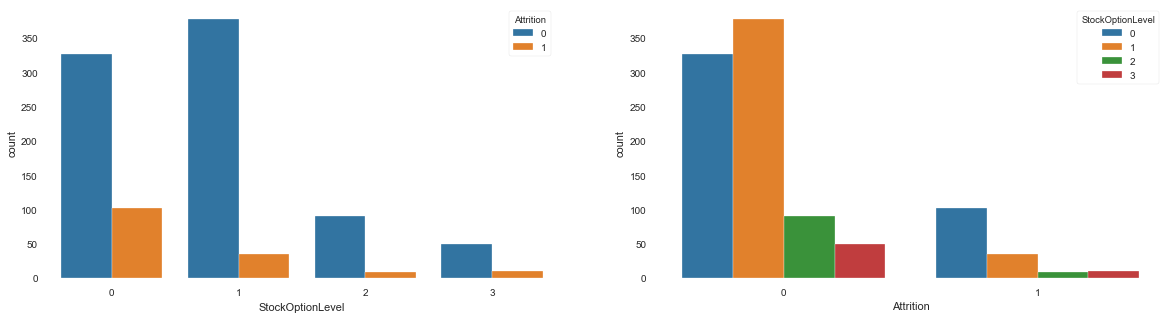

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.StockOptionLevel, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.StockOptionLevel, x = df.Attrition)

**Looks important**

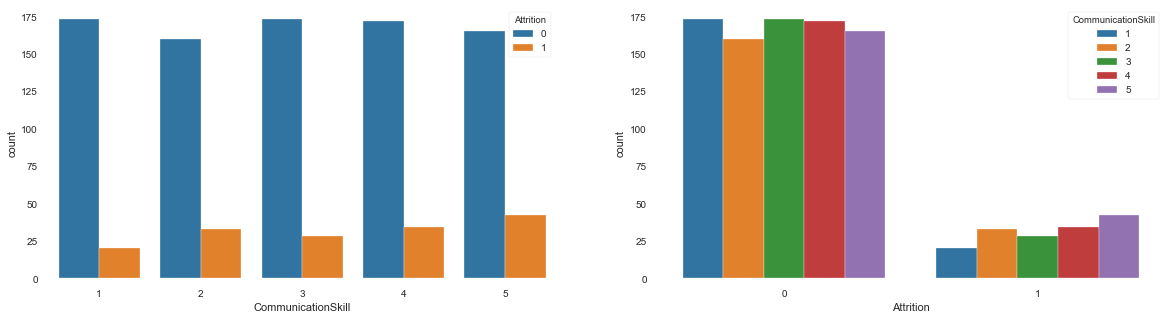

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.CommunicationSkill, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(hue = df.CommunicationSkill, x = df.Attrition)

**This looks important as well** 